In [107]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [108]:
all_df = pd.read_excel("data/titanic3.xls")

In [109]:
cols=['survived','name','pclass' ,'sex', 'age',
       'fare',]
all_df=all_df[cols]

In [110]:
all_df[355:359]

,survived,name,pclass,sex,age,fare
355,1,"Buss, Miss. Kate",2,female,36.0,13.0
356,0,"Butler, Mr. Reginald Fenton",2,male,25.0,13.0
357,0,"Byles, Rev. Thomas Roussel Davids",2,male,42.0,13.0
358,1,"Bystrom, Mrs. (Karolina)",2,female,42.0,13.0


In [111]:
df=all_df.drop(['name'], axis=1)
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)
df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)

In [112]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [113]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [114]:
train_Features[355:359]

array([[0.5       , 0.        , 0.32049799, 0.12687155],
       [0.5       , 0.        , 0.64665896, 0.12687155],
       [0.5       , 0.        , 0.74178924, 0.03122992],
       [0.5       , 1.        , 0.32049799, 0.14346245]])

In [115]:
train_Label[:4]

array([1., 1., 0., 0.])

In [116]:
test_Features.shape

(275, 4)

In [117]:
test_Label.shape

(275,)

In [118]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [119]:
train_Features.shape

(1034, 4)

In [120]:
train_Features = train_Features.reshape(train_Features.shape[0], 2, 2, 1)

In [121]:
train_Features.shape

(1034, 2, 2, 1)

In [122]:
model = Sequential()

In [123]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(2,2,1), 
                 activation='relu'))

In [124]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [125]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [126]:
model.add(Dropout(0.25))

In [127]:
model.add(Flatten())

In [128]:
model.add(Dense(128, activation='tanh'))

In [129]:
model.add(Dropout(0.25))

In [130]:
model.add(Dense(1,activation='sigmoid'))

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 2, 2, 1000)        2000      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 1000)        1001000   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 1000)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 1000)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               512128    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [132]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1034/1034 [==============================] - 7s 7ms/step - loss: 0.1852 - acc: 0.7360


In [133]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=120,verbose=1)

Train on 827 samples, validate on 207 samples
Epoch 1/10
827/827 [==============================] - 3s 4ms/step - loss: 0.1600 - acc: 0.7727 - val_loss: 0.1552 - val_acc: 0.7681
Epoch 2/10
827/827 [==============================] - 3s 4ms/step - loss: 0.1612 - acc: 0.7763 - val_loss: 0.1614 - val_acc: 0.7536
Epoch 3/10
827/827 [==============================] - 3s 4ms/step - loss: 0.1567 - acc: 0.7811 - val_loss: 0.1749 - val_acc: 0.7536
Epoch 4/10
827/827 [==============================] - 4s 5ms/step - loss: 0.1575 - acc: 0.7787 - val_loss: 0.1748 - val_acc: 0.7585
Epoch 5/10
827/827 [==============================] - 4s 5ms/step - loss: 0.1470 - acc: 0.7956 - val_loss: 0.1645 - val_acc: 0.7729
Epoch 6/10
827/827 [==============================] - 4s 5ms/step - loss: 0.1477 - acc: 0.7896 - val_loss: 0.1711 - val_acc: 0.7536
Epoch 7/10
827/827 [==============================] - 5s 6ms/step - loss: 0.1456 - acc: 0.8089 - val_loss: 0.1875 - val_acc: 0.7198
Epoch 8/10
827/827 [==========

In [134]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

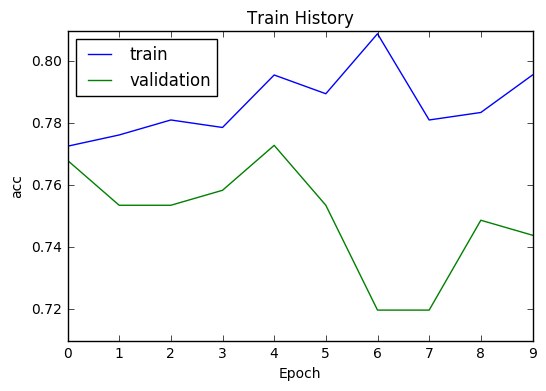

In [135]:
show_train_history(train_history,'acc','val_acc')

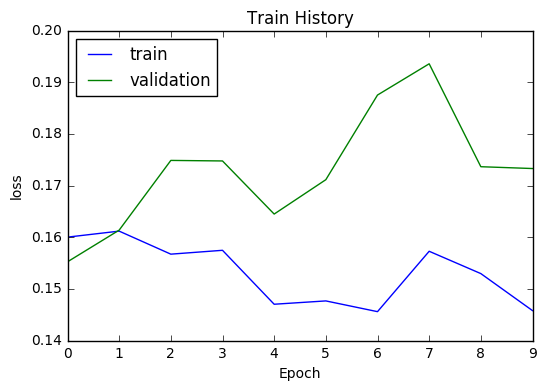

In [136]:
show_train_history(train_history,'loss','val_loss')

In [137]:
test_Features = test_Features.reshape(test_Features.shape[0], 2, 2, 1)

In [138]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 1ms/step


In [139]:
scores[1]

0.7890909110416066